In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Read the Data**

In [2]:
df = pd.read_excel("cost_estimate_raw_data.xlsx")
df.columns = [x.replace(r' ', '') for x in list(df)]
df.sample(15)

,FactoryOverhead,LabourHours,MachineHours,RawMaterials
29,157149,1536,1017,513
11,171700,2476,1228,581
28,169062,1952,1326,619
17,150886,2019,1130,532
12,140686,2087,928,446
21,159450,2122,1188,548
15,140793,1806,902,464
8,155657,1880,945,619
23,175393,2406,1187,695
5,165320,1717,986,666


**Plot FactoryOverhead against  LabourHours**

<AxesSubplot:xlabel='LabourHours', ylabel='FactoryOverhead'>

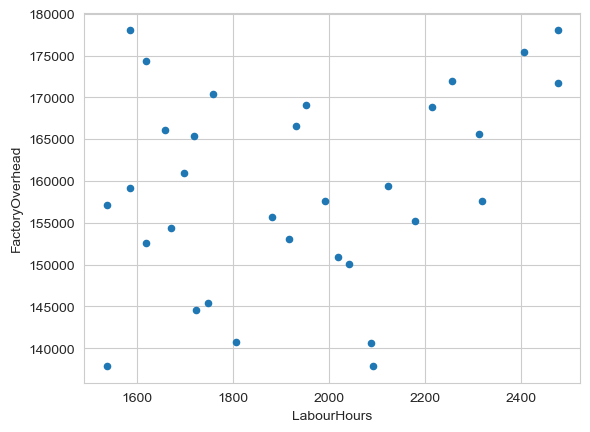

In [3]:
df.plot.scatter(y = "FactoryOverhead", x="LabourHours")

**Plot the cost with estimated regression line**

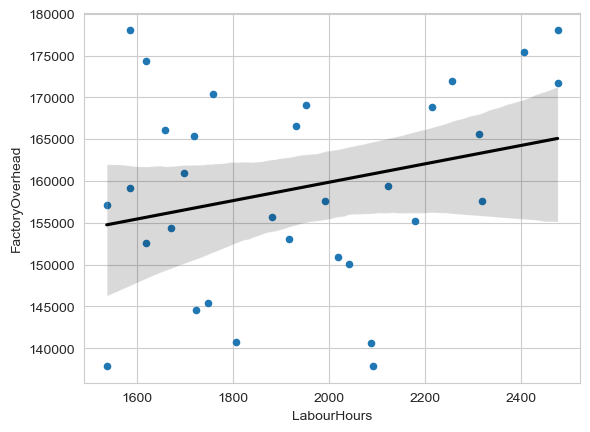

In [4]:
def graph_cost(data, i):
    df.plot.scatter(y = "FactoryOverhead", x= i)
    sns.regplot(data=data, x=i, y="FactoryOverhead", scatter=False, color=".01")
    plt.show()

graph_cost(df, "LabourHours")

**Now for all**

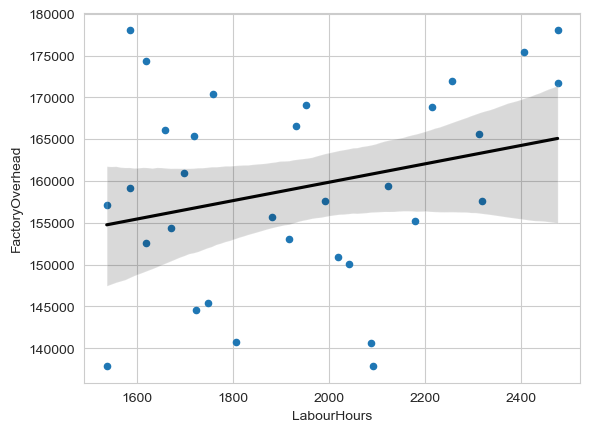

LabourHours


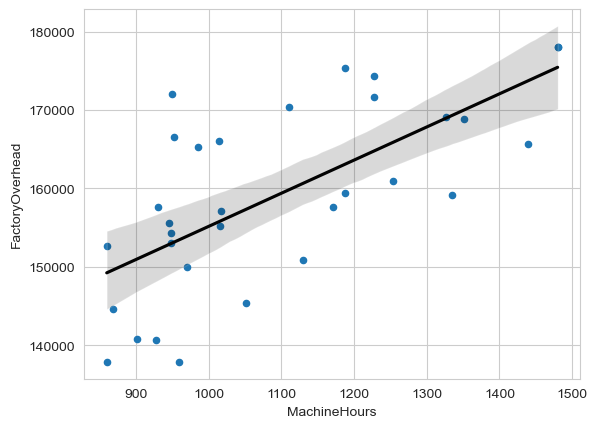

MachineHours


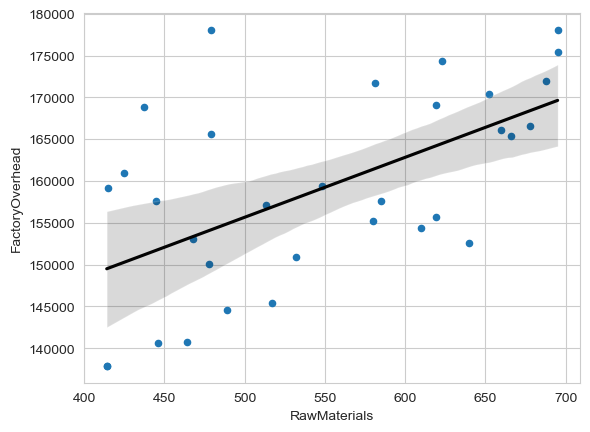

RawMaterials


In [5]:
for i in list(df)[1:]:
    graph_cost(df, i)
    print(i)

**Now run regressions to find the relevant cost parameters**

In [6]:
def regressy(data, indepvar):
    x = data[indepvar]
    y = data['FactoryOverhead']
    x = sm.add_constant(x)
    # Note the difference in argument order
    res = sm.OLS(y, x).fit()
    #predictions = model.predict(X) # make the predictions by the model
    print(res.summary())
    print(f'\nFixed cost: ${res.params[0]:4,.0f}')
    print(f'Variable cost: ${res.params[1]:4,.2f}, per unit of {indepvar}.\n')
    return(res)

res = regressy(df, 'MachineHours')


                            OLS Regression Results                            
Dep. Variable:        FactoryOverhead   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     25.20
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.20e-05
Time:                        19:16:38   Log-Likelihood:                -335.16
No. Observations:                  32   AIC:                             674.3
Df Residuals:                      30   BIC:                             677.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.129e+05   9340.965     12.088   

In [7]:
for i in list(df)[1:]:
    regressy(df, i)

                            OLS Regression Results                            
Dep. Variable:        FactoryOverhead   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.345
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.136
Time:                        19:16:38   Log-Likelihood:                -343.71
No. Observations:                  32   AIC:                             691.4
Df Residuals:                      30   BIC:                             694.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.379e+05    1.4e+04      9.826      

**Lastly: multivariate regression**

In [8]:
def multiple_regress(data):
    x = data[['LabourHours', 'MachineHours', 'RawMaterials']]
    y = data['FactoryOverhead']
    x = sm.add_constant(x)
    # Note the difference in argument order
    res = sm.OLS(y, x).fit()
    #predictions = model.predict(X) # make the predictions by the model
    print(res.summary())
    print(f'\nFixed cost: ${res.params[0]:4,.0f}')
    return(res)

res = multiple_regress(df)

                            OLS Regression Results                            
Dep. Variable:        FactoryOverhead   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     47.17
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.48e-11
Time:                        19:16:38   Log-Likelihood:                -316.10
No. Observations:                  32   AIC:                             640.2
Df Residuals:                      28   BIC:                             646.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          7.15e+04   8484.446      8.427   